In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from highlight_text import fig_text, ax_text
from wordcloud import WordCloud
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

# concatenate all datasets
data_path = '1_movies_per_genre/'
df = pd.DataFrame()
for file in os.listdir(data_path):
    if file.endswith('.csv'):
        dataset = pd.read_csv(data_path + file)
        df = pd.concat([df,dataset])

# calculate duration from h-min to minutes
def duration_to_minutes(duration):
    if 'min' not in duration:
        return int(duration.replace('h', '')) * 60
    hours, minutes = duration.split('h')
    hours = int(hours)
    minutes = int(minutes.replace('min', ''))
    return hours * 60 + minutes
df['duration_min'] = df['run_length'].apply(duration_to_minutes)

# get type of movies
def get_type(movie_type):
    return movie_type.split(';')[0]
df['type'] = df['genres'].apply(get_type)

# filter out 
df = df[df['duration_min']<200]
lower_bound = 1960
upper_bound = 2019
df = df[df['year']>=lower_bound]
df = df[df['year']<=upper_bound]

# save to csv and display properties
df.to_csv('movies.csv', index=False)
df = pd.read_csv('movies.csv')
print(df.shape)
df.head()

(1647, 12)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,duration_min,type
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,152,Action
1,Pulp Fiction,1994,R,2h 34min,Crime; Drama;,14 October 1994 (USA),8.9,1767445,3014,https://www.imdb.com/title/tt0110912/reviews/_...,154,Crime
2,The Godfather,1972,R,2h 55min,Crime; Drama;,24 March 1972 (USA),9.2,1558661,3886,https://www.imdb.com/title/tt0068646/reviews/_...,175,Crime
3,Se7en,1995,R,2h 7min,Crime; Drama; Mystery;,22 September 1995 (USA),8.6,1390231,1460,https://www.imdb.com/title/tt0114369/reviews/_...,127,Crime
4,The Silence of the Lambs,1991,R,1h 58min,Crime; Drama; Thriller;,14 February 1991 (USA),8.6,1223451,1298,https://www.imdb.com/title/tt0102926/reviews/_...,118,Crime


<Axes: >

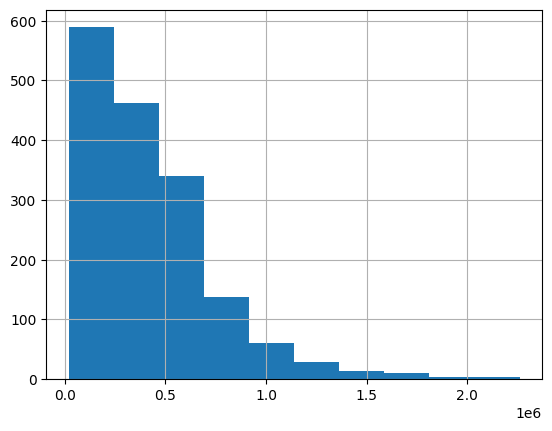

In [204]:
df.num_raters.hist()

/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_13447/2474000556.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


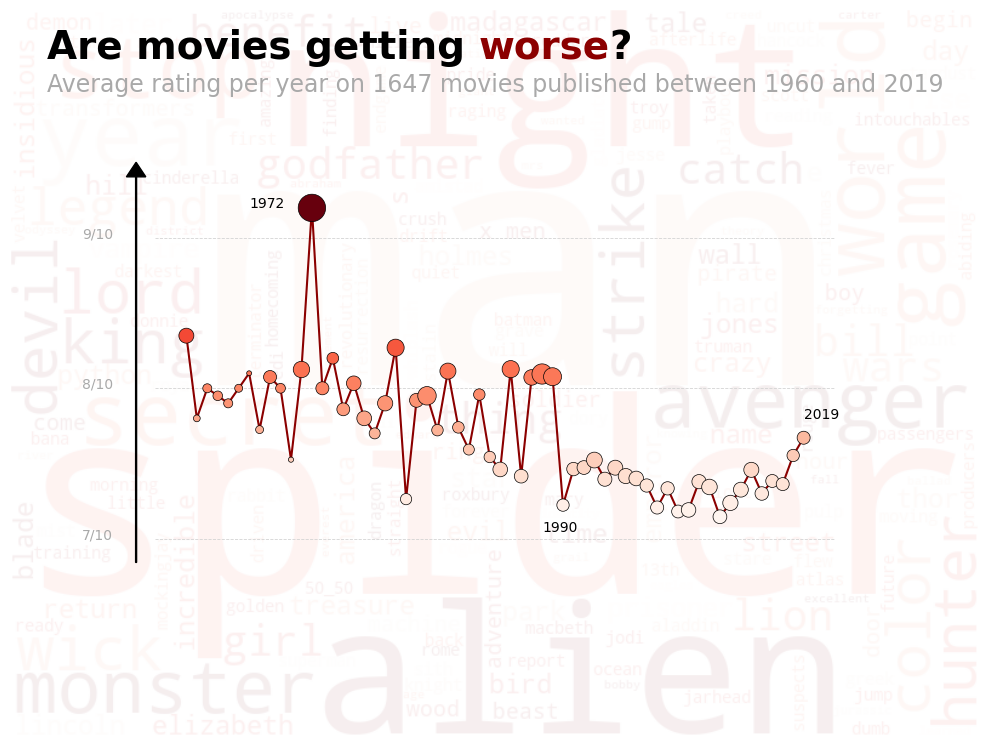

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
titles_combined = ' '.join(df['name'])
titles_combined = list(set(titles_combined.split(' ')))
titles_combined = [word.lower() for word in titles_combined if len(word) > 3]
to_remove = ['man', 'world']
titles_combined = [word for word in titles_combined if word not in to_remove]
titles_combined = ' '.join(titles_combined)

# Generate a word cloud image
wordcloud = WordCloud(
    width=800, height=600,
    background_color ='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2
).generate(titles_combined)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="50%",
    loc='center',
    borderpad=1 
)
yearly_avg_rating = df.groupby('year')[['rating', 'num_raters']].mean().reset_index()
sns.lineplot(
    data=yearly_avg_rating,
    x='year', y='rating',
    color='darkred',
    ax=sub_ax,
    zorder=5
)
cmap = matplotlib.colormaps['Reds']
sub_ax.scatter(
    x=yearly_avg_rating['year'],
    y=yearly_avg_rating['rating'],
    cmap=cmap,
    c=yearly_avg_rating['rating'],
    s=yearly_avg_rating['num_raters']/4000,
    edgecolor='black',
    linewidth=0.5,
    zorder=10,
)
sub_ax.set_axis_off()

# display references
max_rate = 9
min_rate = 7
mid_rate = 8
sub_ax.axhline(y=max_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=min_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=mid_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.text(
    1950, max_rate, f"{max_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, min_rate, f"{min_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, mid_rate, f"{mid_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)

# highlight specific years
sub_ax.text(
    1966, 9.2, '1972',
    fontsize=10, color='black'
)
sub_ax.text(
    1994, 7.05, '1990',
    fontsize=10, color='black'
)
sub_ax.text(
    2019, 7.8, '2019',
    fontsize=10, color='black'
)

# title
text = f"""
Are movies getting <worse>?
<Average rating per year on {df.shape[0]} movies published between {lower_bound} and {upper_bound}>
"""
fig_text(
    0.5, 0.85,
    text, color='black',
    fontweight='bold',
    fontsize=28,
    highlight_textprops=[
        {"color": 'darkred'},
        {"fontsize": 17,
         "color": 'darkgrey',
         "fontweight": 'normal'}
    ],
    ha='center'
)

# vertical line arrow for y axis of the subax
ax.arrow(
    0.13, 0.24, 0, 0.53,
    head_width=0.02, head_length=0.02,
    fc='black', ec='black',
    transform=ax.transAxes
)


plt.tight_layout()
fig.savefig('wordcloud_linechart.png', dpi=300, bbox_inches='tight')
plt.show()